## Import Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Explore Data

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

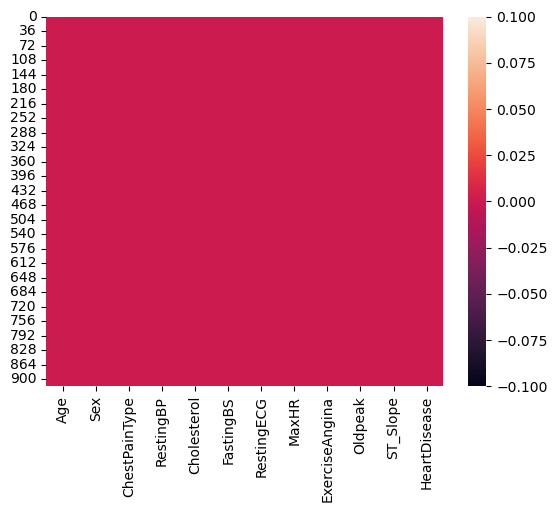

In [8]:
sns.heatmap(data.isnull())

In [9]:
data.duplicated().sum()

0

## Analysis

In [10]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

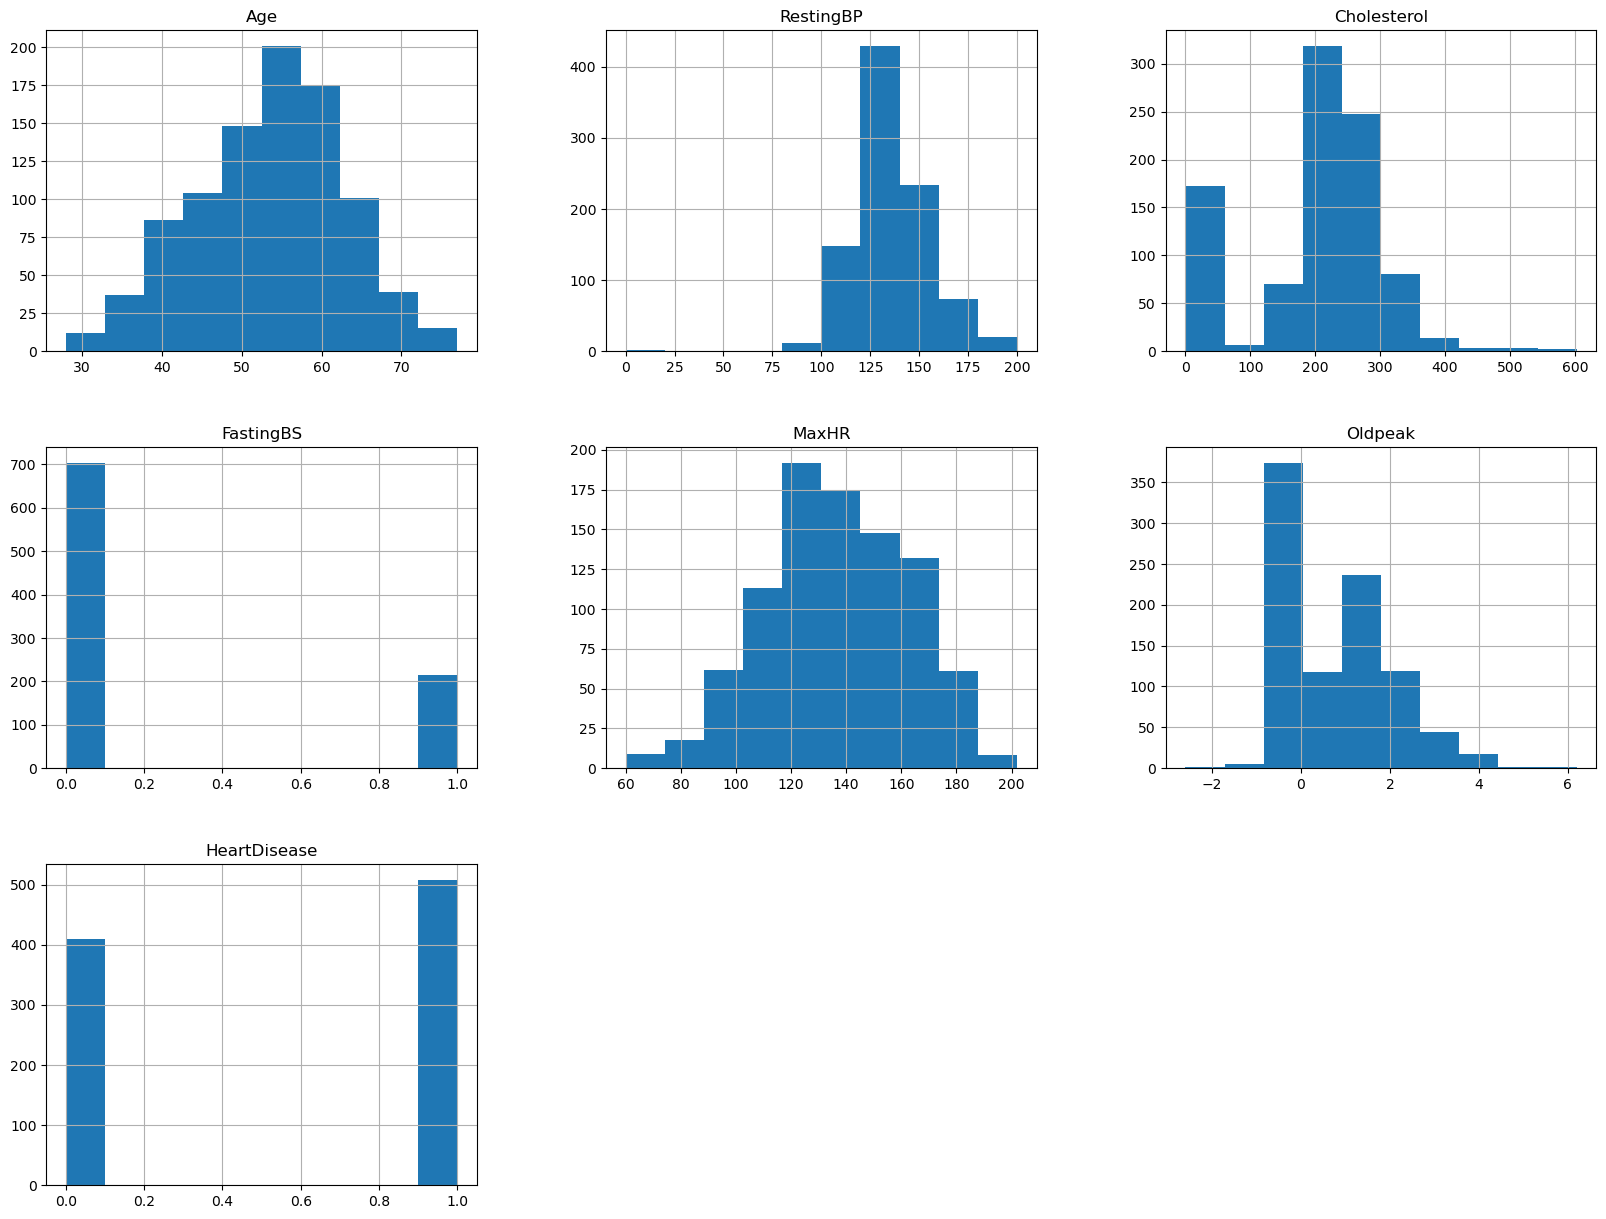

In [11]:
data.hist(figsize=(20 , 15))
plt.show()

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_7412\4082406583.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


<Axes: >

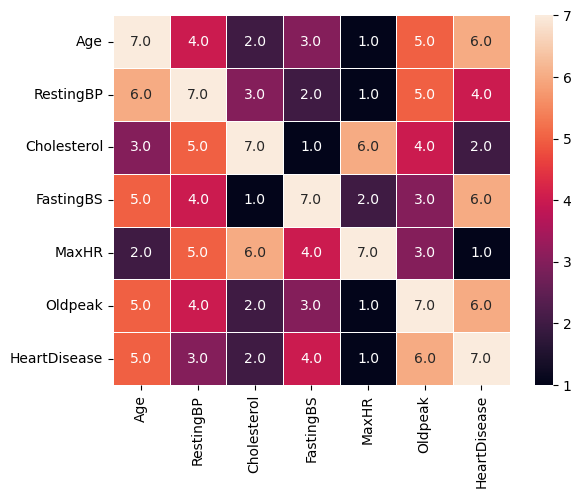

In [12]:
cor=data.corr()
sns.heatmap(cor.rank(axis='columns'),annot=True,fmt='.1f',linewidths=.5)

## Processing Data

In [13]:
sex = pd.get_dummies(data['Sex'])
sex

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
913,0,1
914,0,1
915,0,1
916,1,0


In [14]:
ChestPainType = pd.get_dummies(data['ChestPainType'])
ChestPainType

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [15]:
RestingECG = pd.get_dummies(data['RestingECG'])
RestingECG

,LVH,Normal,ST
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
913,0,1,0
914,0,1,0
915,0,1,0
916,1,0,0


In [16]:
ExerciseAngina = pd.get_dummies(data['ExerciseAngina'])
ExerciseAngina

,N,Y
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
913,1,0
914,1,0
915,0,1
916,1,0


In [17]:
ST_Slope = pd.get_dummies(data['ST_Slope'])
ST_Slope

,Down,Flat,Up
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
913,0,1,0
914,0,1,0
915,0,1,0
916,0,1,0


In [18]:
data = pd.concat([data , sex , ChestPainType , RestingECG , ExerciseAngina ,ST_Slope ] , axis='columns')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,0,0,1,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,0,0,0,1,1,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,0,0,0,1,0,0,1,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,...,0,1,0,1,0,1,0,0,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,...,0,0,0,1,0,1,0,0,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,...,0,0,0,1,0,0,1,0,1,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,...,0,0,1,0,0,1,0,0,1,0


In [19]:
data = data.drop([ 'Sex' , 'ChestPainType' , 'RestingECG' , 'ExerciseAngina' ,'ST_Slope' ] , axis='columns')
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,ASY,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


## Building Our Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [21]:
X = data.drop(['HeartDisease'],axis=1)
y = data['HeartDisease']

## Train / Test Split Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Model Training and Prediction

In [23]:
def all(model):
    model.fit(X_train,y_train)
    pre = model.predict(X_test)
    print(confusion_matrix(pre,y_test))
    print(classification_report(pre,y_test))

In [24]:
model1 = KNeighborsClassifier()
all(model1)

[[55 32]
 [22 75]]
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        87
           1       0.70      0.77      0.74        97

    accuracy                           0.71       184
   macro avg       0.71      0.70      0.70       184
weighted avg       0.71      0.71      0.70       184



In [26]:
model2 = DecisionTreeClassifier()
all(model2)

[[65 26]
 [12 81]]
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        91
           1       0.76      0.87      0.81        93

    accuracy                           0.79       184
   macro avg       0.80      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184



In [27]:
model3 =GaussianNB()
all(model3)

[[70 18]
 [ 7 89]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        88
           1       0.83      0.93      0.88        96

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [28]:
model4 = SVC()
all(model4)

[[54 34]
 [23 73]]
              precision    recall  f1-score   support

           0       0.70      0.61      0.65        88
           1       0.68      0.76      0.72        96

    accuracy                           0.69       184
   macro avg       0.69      0.69      0.69       184
weighted avg       0.69      0.69      0.69       184



In [29]:
model5 = RandomForestClassifier()
all(model5)

[[67 14]
 [10 93]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        81
           1       0.87      0.90      0.89       103

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [30]:
model6 = GradientBoostingClassifier()
all(model6)

[[68 13]
 [ 9 94]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        81
           1       0.88      0.91      0.90       103

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



## In the end it is better the GradientBoostingClassifier and RandomForestClassifier